In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('..')  # enable import from src/

In [2]:
from pathlib import Path

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import torch
import json
import wandb

from src.utils import load_all_results, boxplot_bound

In [4]:
# results_dir = Path('../data/results/2min')
from copy import deepcopy


results_dir = Path('../data/results/')
opts_dir = Path('../data/interim/')

T = 125
TIME_BUDGET = 2 * 60

net_ids = {
    'Baseline': 'baseline',
    'Optimals': 'gbmooeqh',
    'MultiTarget': 'xae9giql',
}

hps = {
    'Baseline':{
        'obj': {
            'bs': 'bs_0',
        },
        'feas': {
            'bs': 'bs_0',
        }
    },
    'Optimals':{
        'obj': {
            'ws': 'ws_750',
            'ef': 'ef_500',
            'tr': 'tr_1000_5',
        },
        'feas': {
            'ws': 'ws_1000',
            'ef': 'ef_750',
            'tr': 'tr_1000_1',
        }
    },
    'MultiTarget':{
        'obj': {
            'ws': 'ws_1750',
            'ef': 'ef_1000',
            'tr': 'tr_1250_1',
        },
        'feas': {
            'ws': 'ws_1500',
            'ef': 'ef_1250',
            'tr': 'tr_1750_1',
        }
    }
}
fpaths = deepcopy(hps)

for m in hps.keys():
    print()
    print(m)
    print(net_ids[m])

    for p in hps[m].keys():
        print(p)
        for h, sn in hps[m][p].items():
            fpaths[m][p][h] = [fp for fp in results_dir.glob(f'{net_ids[m]}_{sn}_{T}_*.json') if int(fp.name.split('_')[-1][:-len('.json')]) >= 20]
            print(sn,':',len(fpaths[m][p][h]))


Baseline
baseline
obj
bs_0 : 60
feas
bs_0 : 60

Optimals
gbmooeqh
obj
ws_750 : 60
ef_500 : 60
tr_1000_5 : 60
feas
ws_1000 : 60
ef_750 : 60
tr_1000_1 : 60

MultiTarget
xae9giql
obj
ws_1750 : 60
ef_1000 : 60
tr_1250_1 : 60
feas
ws_1500 : 60
ef_1250 : 60
tr_1750_1 : 60


In [5]:
dfs = list()
for m in fpaths.keys():
    for p in fpaths[m].keys():
        for h, fpathss in fpaths[m][p].items():
            if len(fpathss) > 0:
                # print(f"{net_ids[m]}_{hps[m][p][h]}")
                df = load_all_results(f"{net_ids[m]}_{hps[m][p][h]}", results_dir, opts_dir, test=True)
                df['model'] = m
                df['goal'] = p
                df['heuristic'] = h
                df['sn'] = hps[m][p][h]
                dfs.append(df)
df = pd.concat(dfs)
df['rel_obj'] = df['objective'] / df['opt_obj']
df

,size,size_id,opt_obj,infeasible,runtime,objective,gap,primal_curve,time_to_feasible,model,goal,heuristic,sn,rel_obj
0,20,26,13192,False,120.009551,13078.0,0.048675,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",72.438,Baseline,obj,bs,bs_0,0.991358
1,24,28,19396,False,120.003490,18206.0,0.125359,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",84.094,Baseline,obj,bs,bs_0,0.938647
2,24,25,7626,True,120.004686,0.0,-1.000000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",120.000,Baseline,obj,bs,bs_0,0.0
3,24,33,15243,True,120.002107,0.0,-1.000000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",120.000,Baseline,obj,bs,bs_0,0.0
4,22,36,14741,False,120.000648,14472.0,0.054584,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",79.188,Baseline,obj,bs,bs_0,0.981752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,24,29,17200,False,120.002489,17199.0,0.011099,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",32.386,MultiTarget,feas,tr,tr_1750_1,0.999942
56,24,21,12100,True,58.594544,0.0,-1.000000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",120.000,MultiTarget,feas,tr,tr_1750_1,0.0
57,22,20,12062,True,0.714531,0.0,-1.000000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",120.000,MultiTarget,feas,tr,tr_1750_1,0.0
58,20,29,14634,True,0.788654,0.0,-1.000000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",120.000,MultiTarget,feas,tr,tr_1750_1,0.0


In [6]:
gb = df.groupby(['model', 'goal', 'heuristic'])
print('Infeasibility')
gb['infeasible'].sum() / gb['sn'].count()

Infeasibility


model        goal  heuristic
Baseline     feas  bs           0.416667
             obj   bs           0.416667
MultiTarget  feas  ef           0.216667
                   tr           0.300000
                   ws           0.333333
             obj   ef           0.200000
                   tr           0.183333
                   ws           0.366667
Optimals     feas  ef           0.333333
                   tr           0.466667
                   ws           0.366667
             obj   ef           0.216667
                   tr           0.383333
                   ws           0.416667
dtype: float64

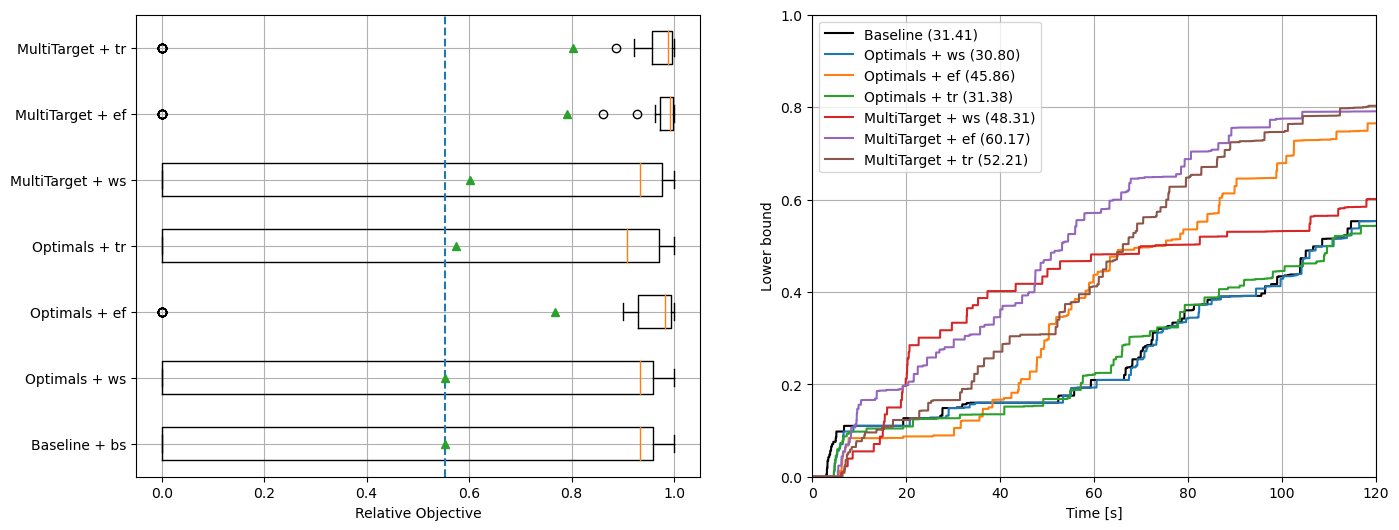

In [7]:
fig, axs = plt.subplots(1,2)
fig.set_size_inches(16,6)

axs = boxplot_bound(df, 'obj', 'rel_obj', axs, TIME_BUDGET=TIME_BUDGET)
axs[0].set_xlabel('Relative Objective')

fig.show()

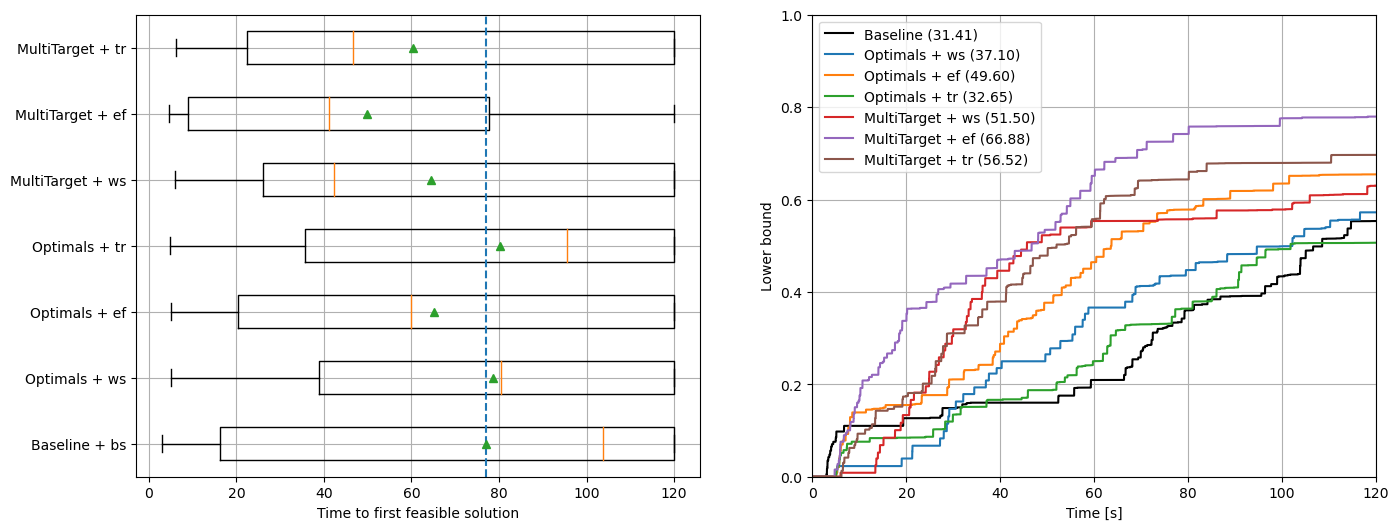

In [8]:
fig, axs = plt.subplots(1,2)
fig.set_size_inches(16,6)

axs = boxplot_bound(df, 'feas', 'time_to_feasible', axs, TIME_BUDGET=TIME_BUDGET)
axs[0].set_xlabel('Time to first feasible solution')

fig.show()

In [86]:
# TODO

# sizes = sorted(dfs['baseline_bs_0']['size'].unique())

# fig, axss = plt.subplots(len(sizes),3)

# fig.set_size_inches(16,len(sizes) * 6)

# for i, s in enumerate(sizes):
#     axs = axss[i]

#     axs[0].set_title('early fixing')
#     axs[1].set_title('warm starting')
#     axs[2].set_title('trust region')

#     for sn, df_ in dfs.items():
#         df = df_[df_['size'] == s]

#         dt = 1e-3
#         curve = df['primal_curve'].mean()
#         auc = np.sum(curve * dt)
#         x = np.arange(len(curve)) * dt

#         if 'ef' in sn:
#             ax = axs[0]
#         elif 'ws' in sn:
#             ax = axs[1]
#         elif 'tr' in sn:
#             ax = axs[2]
#         else:
#             for ax in axs:
#                 ax.plot(x, curve, color='black', label=f"baseline ({auc:.2f})")
#             continue
#         # ax.plot(x, curve, label=sn+f" ({auc:.2f})")
#         ax.plot(x, curve, label=sn.split('_')[0]+' '+sn.split('_')[2]+f" ({auc:.2f})")
#         ax.set_ylabel('lower bound')
#         ax.set_xlabel('time')
#     # plt.plot(df[~df['infeasible']]['primal_curve'].mean())

#     for ax in axs:
#         ax.set_xlim(0,120)
#         ax.set_ylim(0,1)
#         ax.legend()
#         ax.grid()

#     axs[0].set_ylabel(f'# of jobs = {s}')
# plt.show()